In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from json import loads, dumps
import math
import matplotlib



In [9]:
def parse_feature_importance(dataframe):

    result = dataframe['feature_importance'].fillna('{}')

    number_of_features = []
    features = []
    for i in result:
        j = i.replace("\'", "\"")
        js = loads(j)
        number_of_features.append(len(js.values()))
        features.append(list(js.keys()))

#     print(number_of_features)
    return number_of_features, features


def parse_join_path_features(dataframe):
    dataframe['join_path_features'] = dataframe['join_path_features'].fillna('')
    result = dataframe['join_path_features']

    number_of_features = []
    jp_features = []
    for i in result:
        j = i.replace("[", "")
        j = j.replace("]", "")
        j = j.replace("'", "")
        k = j.split(", ")
    #     print(k)
    #     print(len(k))

        if len(k) == 1:
            number_of_features.append(0)
        else:
            number_of_features.append(len(k))
        jp_features.append(k)

#     print(number_of_features)
    # print(jp_features)
    return number_of_features, jp_features




def determine_common_features(dataframe):

    nr_common_features = []
    difference = []

    for i, values in enumerate(features):
        set_a = set(values)
        set_b = set(jp_features[i])

#         print(set_a)
#         print(set_b)
    #     print(len(set_a.intersection(set_b)))

        nr_common_features.append(len(set_a.intersection(set_b)))
        difference.append(set_b - set_a)

    # print(nr_common_features)
    # print(difference)
    return nr_common_features, difference

# Ablation

In [2]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/ablation"
filename = "k_results.csv"
filename_vr = "value_ratio_results.csv"


# Read data
df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename}"), header=0)
df_vr = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename_vr}"), header=0)

df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
df_vr.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


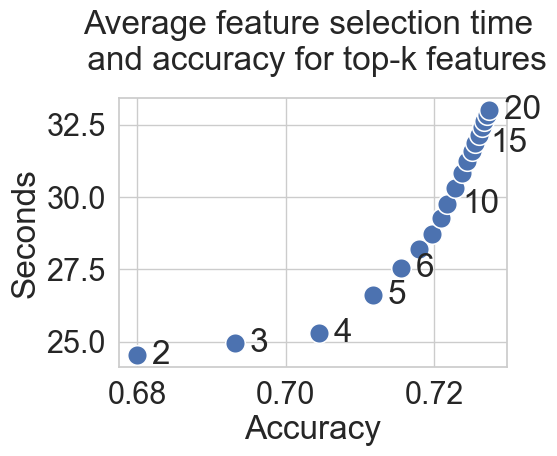

In [5]:
top_k = df[~df['data_label'].isin(['superconduct', 'yprop', 'air'])]
top_k = top_k.groupby(by=['top_k'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", data=top_k, s=200, ax=ax)

for a in top_k['top_k'].unique():
    b = top_k[top_k['top_k'] == a]
    if int(a) < 7 or int(a) == 10 or int(a) == 15 or int(a) == 20:
        ax.annotate(a, (b['accuracy']+0.002, b['feature_selection_time']-0.3))
        
ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Average feature selection time \n and accuracy for top-k features', pad=20)

plt.savefig('plots/all/ablation_top_k-bigger.pdf', dpi=300, bbox_inches="tight")



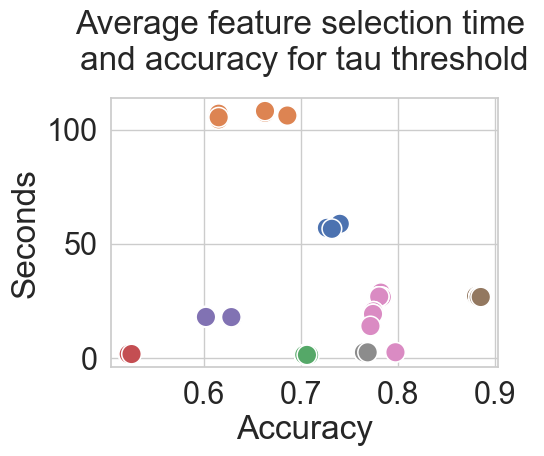

In [6]:
vr = df_vr[~df_vr['data_label'].isin(['superconduct', 'yprop', 'air'])]
vr = vr.groupby(by=['data_label', 'cutoff_threshold'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()

mini = vr[vr['cutoff_threshold'] < 0.65]


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
p = sns.color_palette("tab10")

sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", hue='data_label', data=vr, s=200, ax=ax, c=p)

ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Average feature selection time \nand accuracy for tau threshold', pad=20)

hh, ll = plt.gca().get_legend_handles_labels()
ax.get_legend().remove()

 
plt.savefig('plots/all/dataset_ablation_value_ratio.pdf', dpi=300, bbox_inches="tight")



/Users/andra/Developer/auto-data-augmentation/env/lib/python3.8/site-packages/seaborn/relational.py:658: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(*args, **kws)


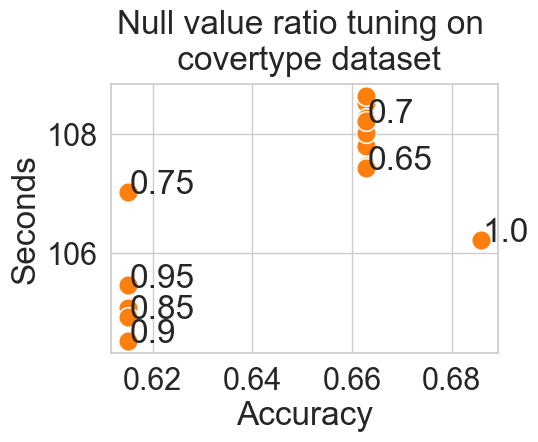

In [7]:
vr = df_vr[df_vr['data_label'].isin(['covertype'])]
vr = vr.groupby(by=['data_label', 'cutoff_threshold'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()

mini = vr[vr['cutoff_threshold'] < 0.65]


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
p = sns.color_palette("tab10")

sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", data=vr, s=200, ax=ax, c=p[1])

for a in vr['cutoff_threshold'].unique():
    b = vr[vr['cutoff_threshold'] == a]
    if round(a, 2) > 0.6 and not (round(a, 2) == 0.8):
        ax.annotate(round(a, 2), (b['accuracy']+ 0.0003, b['feature_selection_time']-0.03))
        
ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Null value ratio tuning on \n covertype dataset', pad=10)

 
plt.savefig('plots/all/covertype_ablation_value_ratio_orange.pdf', dpi=300, bbox_inches="tight")



/Users/andra/Developer/auto-data-augmentation/env/lib/python3.8/site-packages/seaborn/relational.py:658: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(*args, **kws)


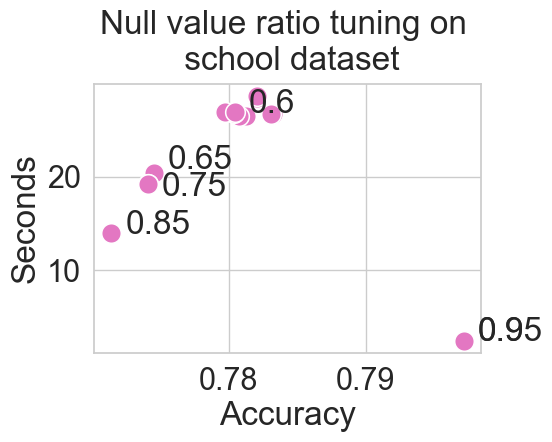

In [8]:
vr = df_vr[df_vr['data_label'].isin(['school'])]
vr = vr.groupby(by=['cutoff_threshold'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()

mini = vr[vr['cutoff_threshold'] < 0.65]


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
p = sns.color_palette("tab10")


sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", data=vr, s=200, ax=ax, c=p[6])

for a in vr['cutoff_threshold'].unique():
    b = vr[vr['cutoff_threshold'] == a]
    if round(a, 2) > 0.55 and not (round(a, 2) in (0.65, 0.7, 0.75, 0.8)):
        ax.annotate(round(a, 2), (b['accuracy']+ 0.001, b['feature_selection_time']-0.03))
    if round(a, 2) ==0.75:
        ax.annotate(round(a, 2), (b['accuracy']+ 0.001, b['feature_selection_time']-1.3))
    if round(a, 2) ==0.65:
        ax.annotate(round(a, 2), (b['accuracy']+ 0.001, b['feature_selection_time']+0.5))
        
ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Null value ratio tuning on \n school dataset', pad=10)

plt.savefig('plots/all/school_ablation_value_ratio-pink.pdf', dpi=300, bbox_inches="tight")



# Benchmark setting

In [10]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/benchmark-setting"
tfd_filename = "results_tfd_train_all.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)

# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])

# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
number_of_features, features = parse_feature_importance(dataframe)
dataframe['number_features_importance'] = number_of_features

number_of_features, jp_features = parse_join_path_features(dataframe)
dataframe['number_join_path_features'] = number_of_features

nr_common_features, difference = determine_common_features(dataframe)
dataframe['nr_common_features'] = nr_common_features
dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)


['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost']
['school', 'bioresponse', 'eyemove', 'covertype', 'miniboone', 'jannis', 'steel', 'credit', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE']


In [13]:
l = dataframe[dataframe['algorithm'] == 'LightGBM']
gb = l.groupby(['data_label', 'approach'], as_index=False)
subset = {k: v[0] for k, v in gb.groups.items()}
idx = l.index.isin(list(subset.values()))
df_basic = l.iloc[idx, :]


In [14]:
# Join path length 
df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='credit'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='jannis'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='miniboone'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='covertype'].index, 'join_path_length'] = [2, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='eyemove'].index, 'join_path_length'] = [2, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='bioresponse'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='school'].index, 'join_path_length'] = [1, 1, 1, 0]

# Number of joined tables 
df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'nr_joined_tables'] = [14, 3, 3, 14]
df_basic.loc[df_basic[df_basic['data_label']=='credit'].index, 'nr_joined_tables'] = [2, 2, 2, 4]
df_basic.loc[df_basic[df_basic['data_label']=='jannis'].index, 'nr_joined_tables'] = [1, 3, 3, 11]
df_basic.loc[df_basic[df_basic['data_label']=='miniboone'].index, 'nr_joined_tables'] = [2, 3, 3, 14]
df_basic.loc[df_basic[df_basic['data_label']=='covertype'].index, 'nr_joined_tables'] = [8, 3, 3, 11]
df_basic.loc[df_basic[df_basic['data_label']=='eyemove'].index, 'nr_joined_tables'] = [4, 3, 3, 5]
df_basic.loc[df_basic[df_basic['data_label']=='bioresponse'].index, 'nr_joined_tables'] = [1, 3, 3, 39]
df_basic.loc[df_basic[df_basic['data_label']=='school'].index, 'nr_joined_tables'] = [1, 16, 2, 16]

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_83676/4222864123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 1, 0]
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_83676/4222864123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'nr_joined_tables'] = [14, 3, 3, 14]


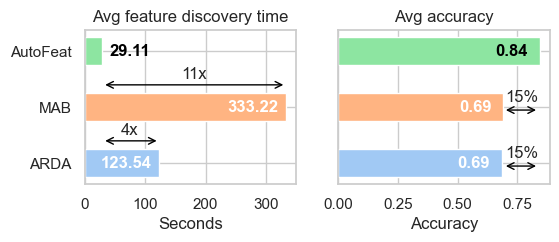

In [16]:
avgd_all = []

# a = dataframe.groupby(['approach', 'algorithm', 'data_label',])[['accuracy']].max().reset_index(level=['algorithm', 'data_label'])
a = dataframe.groupby(['approach', 'algorithm', 
                       'data_label'])[['feature_selection_time', 
                                       'train_time', 'accuracy']].max().reset_index(level=['algorithm', 
                                                                                           'data_label'])



ARDA = a.loc['ARDA']
ARDA = ARDA[~ARDA['data_label'].isin(['superconduct', 'yprop'])]


avgd = {}
avgd['approach'] = 'ARDA'
avgd['avg_acc'] = ARDA['accuracy'].mean()
avgd['avg_feat_sel_time'] = ARDA['feature_selection_time'].mean()
avgd['avg_train_time'] = ARDA['train_time'].mean()

avgd_all.append(avgd)


MAB = a.loc['MAB']
MAB = MAB[~MAB['data_label'].isin(['superconduct', 'yprop'])]

avgd = {}
avgd['approach'] = 'MAB'
avgd['avg_acc'] = MAB['accuracy'].mean()
avgd['avg_feat_sel_time'] = MAB['feature_selection_time'].mean()
avgd['avg_train_time'] = MAB['train_time'].mean()
avgd_all.append(avgd)


TFD_BFS = a.loc['AutoFeat']
TFD_BFS = TFD_BFS[~TFD_BFS['data_label'].isin(['superconduct', 'yprop'])]

avgd = {}
avgd['approach'] = 'AutoFeat'
avgd['avg_acc'] = TFD_BFS['accuracy'].mean()
avgd['avg_feat_sel_time'] = TFD_BFS['feature_selection_time'].mean()
avgd['avg_train_time'] = TFD_BFS['train_time'].mean()
avgd_all.append(avgd)


avgdf = pd.DataFrame(avgd_all)


pal = sns.color_palette("pastel")
sns.set(font_scale=1, style="whitegrid")


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

rects1 = ax1.barh(avgdf['approach'], avgdf['avg_feat_sel_time'], align='center', height=0.5, 
                  color=[pal[0], pal[1], pal[2]], 
                  )

rects2 = ax2.barh(avgdf['approach'], avgdf['avg_acc'], align='center', height=0.5,
                 color=[pal[0], pal[1], pal[2]],)

large_percentiles = [round(p, 2) if p > 50 else '' for p in avgdf['avg_feat_sel_time']]
small_percentiles = [round(p, 2) if p <= 50 else '' for p in avgdf['avg_feat_sel_time']]
ax1.bar_label(rects1, small_percentiles,
              padding=5, color='black', fontweight='bold')
ax1.bar_label(rects1, large_percentiles,
              padding=-42, color='white', fontweight='bold')


large_percentiles = [round(p, 2) if p > 0.7 else '' for p in avgdf['avg_acc']]
small_percentiles = [round(p, 2) if p <= 0.7 else '' for p in avgdf['avg_acc']]
ax2.bar_label(rects2, small_percentiles,
              padding=-32, color='white', fontweight='bold')
ax2.bar_label(rects2, large_percentiles,
              padding=-32, color='black', fontweight='bold')


ax1.set_xlabel('Seconds')
ax2.set_xlabel('Accuracy')

ax1.set_title('Avg feature discovery time')
ax2.set_title('Avg accuracy')

ax1.annotate('',xy=(123.54, 0.4),xytext=(29.11, 0.4), arrowprops=dict(arrowstyle="<->", color='black'))
ax1.annotate("4x", xy=(60, 0.5))

ax1.annotate('',xy=(333.22, 1.4),xytext=(29.11, 1.4), arrowprops=dict(arrowstyle="<->", color='black'))
ax1.annotate("11x", xy=(160, 1.5))

ax2.annotate('',xy=(0.84, -0.05),xytext=(0.69, -0.05), arrowprops=dict(arrowstyle="<->", color='black'))
ax2.annotate("15%", xy=(0.7, 0.1))

ax2.annotate('',xy=(0.84, 0.95),xytext=(0.69, 0.95), arrowprops=dict(arrowstyle="<->", color='black'))
ax2.annotate("15%", xy=(0.7, 1.1))


plt.savefig('plots/all/simple_crown-fixed.pdf', dpi=300, bbox_inches="tight")



## Classification

<Figure size 640x480 with 0 Axes>

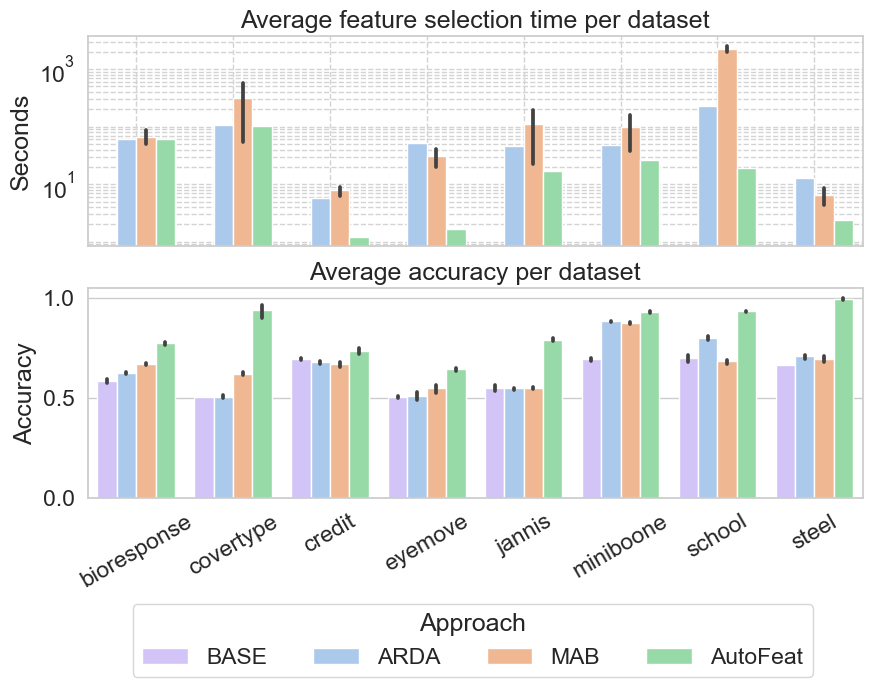

In [17]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

df_basic.sort_values('data_label')


total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', 'feature_selection_time'])[['accuracy']].max().reset_index()
total_time['feature_selection_time'] = total_time['feature_selection_time']

taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]


accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y="feature_selection_time", hue="approach", 
                data=taux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)

ax1.set_title("Average feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')


ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset")  

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.45), ncol=4, title="Approach")

plt.savefig('plots/all/simple_acc_feature_selection_time_classification_train_all-fixed.pdf', dpi=300, bbox_inches="tight")

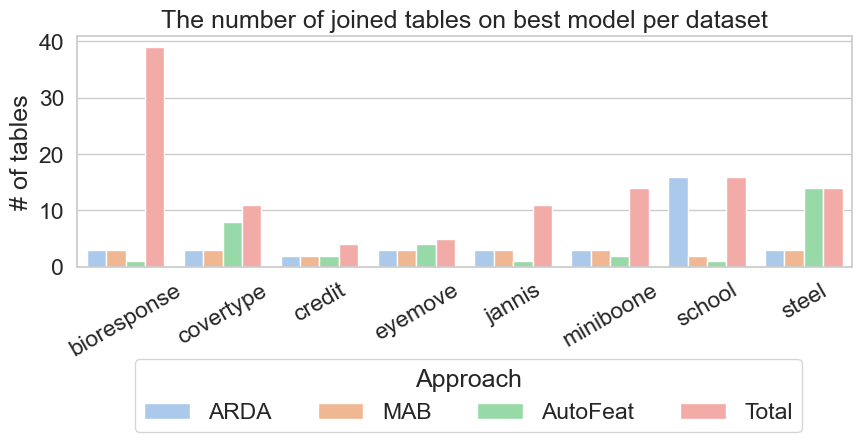

In [18]:
fig = plt.figure(figsize=(10, 3))
sns.set(font_scale=1.5, style="whitegrid")


taux = df_basic[~df_basic['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux.sort_values(by=['data_label'])
taux.loc[taux[taux['approach']=='BASE'].index, 'approach'] = "Total"

ax2 = sns.barplot(x="data_label", y="nr_joined_tables", hue="approach", 
                data=taux, 
                palette=[pal[0], pal[1], pal[2], pal[3]], hue_order=['ARDA', 'MAB', 'AutoFeat', 'Total'])


ax2.set_xlabel('')
ax2.set_ylabel('# of tables')
ax2.set_title("The number of joined tables on best model per dataset")
loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=30)

hh, ll = plt.gca().get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.35), ncol=4, title="Approach")
plt.savefig('plots/all/simple_path_train_all.pdf', dpi=300, bbox_inches="tight")

# Data lake setting

In [21]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/benchmark-setting"
base_filename = "results_base.csv"

df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)

dataset_path = "results/data_lake_setting"
tfd_filename = "results_tfd_train_all.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"

# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_base, df_mab])

# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)

dataframe.reset_index(inplace=True, drop=True)



['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost']
['credit', 'steel', 'jannis', 'miniboone', 'covertype', 'eyemove', 'bioresponse', 'school', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'BASE', 'MAB']


In [22]:
l = dataframe[dataframe['algorithm'] == 'LightGBM']
gb = l.groupby(['data_label', 'approach', 'algorithm'], as_index=False)
subset = {k: v[0] for k, v in gb.groups.items()}
idx = l.index.isin(list(subset.values()))
df_basic_dd = l.iloc[idx, :]


In [23]:
# Join path length 
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='credit'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='jannis'].index, 'join_path_length'] = [2, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='miniboone'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='covertype'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='eyemove'].index, 'join_path_length'] = [2, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='bioresponse'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='school'].index, 'join_path_length'] = [1, 1, 0, 1]

# Number of joined tables 
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'nr_joined_tables'] = [15, 3, 15, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='credit'].index, 'nr_joined_tables'] = [2, 2, 5, 2]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='jannis'].index, 'nr_joined_tables'] = [9, 4, 12, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='miniboone'].index, 'nr_joined_tables'] = [2, 15, 15, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='covertype'].index, 'nr_joined_tables'] = [3, 12, 12, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='eyemove'].index, 'nr_joined_tables'] = [4, 3, 6, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='bioresponse'].index, 'nr_joined_tables'] = [1, 23, 40, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='school'].index, 'nr_joined_tables'] = [1, 16, 17, 2]


/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_83676/1732588142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 0, 1]
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_83676/1732588142.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'nr_joined_tables'] = [15, 3, 15, 3]


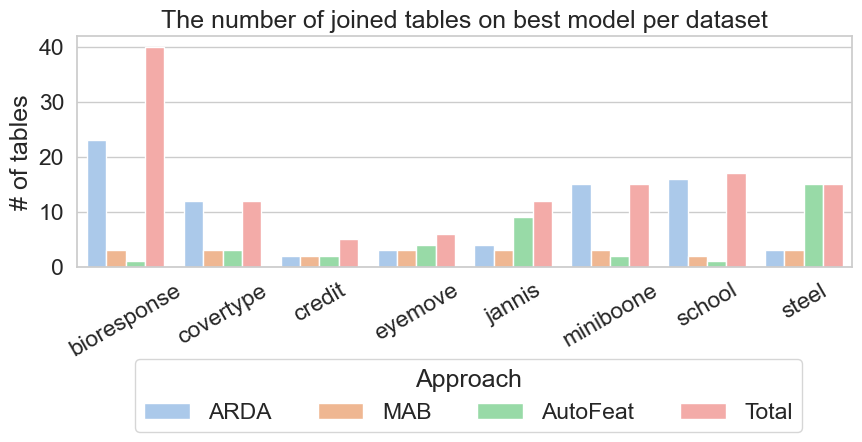

In [24]:
fig = plt.figure(figsize=(10, 3))


taux = df_basic_dd[~df_basic_dd['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux.sort_values(by=['data_label'])
taux.loc[taux[taux['approach']=='BASE'].index, 'approach'] = "Total"


ax2 = sns.barplot(x="data_label", y="nr_joined_tables", hue="approach", 
                data=taux, 
                palette=[pal[0], pal[1], pal[2], pal[3]], hue_order=['ARDA', 'MAB', 'AutoFeat', 'Total'])


ax2.set_xlabel('')
ax2.set_ylabel('# of tables')
ax2.set_title("The number of joined tables on best model per dataset")
loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=30)


hh, ll = plt.gca().get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.35), ncol=4, title="Approach")
plt.savefig('plots/all/dd_simple_path_train_all.pdf', dpi=300, bbox_inches="tight")

ARDA: 0.6921761074376288
MAB: 0.6914257244508032
TFD: 0.7332853705123459


,approach,avg_acc,avg_feat_sel_time,avg_train_time
0,ARDA,0.692176,104.690381,3.986914
1,MAB,0.691426,363.463611,0.000000
2,AutoFeat,0.733285,33.077186,17.519194


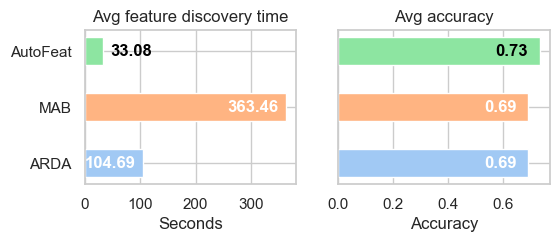

In [25]:
avgd_all = []

# a = dataframe.groupby(['approach', 'algorithm', 'data_label',])[['accuracy']].max().reset_index(level=['algorithm', 'data_label'])
a = dataframe.groupby(['approach', 'algorithm', 
                       'data_label'])[['feature_selection_time', 
                                       'train_time', 'accuracy']].max().reset_index(level=['algorithm', 
                                                                                           'data_label'])



ARDA = a.loc['ARDA']
ARDA = ARDA[~ARDA['data_label'].isin(['superconduct', 'yprop'])]

print(f"ARDA: {ARDA['accuracy'].mean()}")

avgd = {}
avgd['approach'] = 'ARDA'
avgd['avg_acc'] = ARDA['accuracy'].mean()
avgd['avg_feat_sel_time'] = ARDA['feature_selection_time'].mean()
avgd['avg_train_time'] = ARDA['train_time'].mean()

avgd_all.append(avgd)

MAB = a.loc['MAB']
MAB = MAB[~MAB['data_label'].isin(['superconduct', 'yprop'])]
print(f"MAB: {MAB['accuracy'].mean()}")

avgd = {}
avgd['approach'] = 'MAB'
avgd['avg_acc'] = MAB['accuracy'].mean()
avgd['avg_feat_sel_time'] = MAB['feature_selection_time'].mean()
avgd['avg_train_time'] = MAB['train_time'].mean()
avgd_all.append(avgd)


TFD_BFS = a.loc['AutoFeat']
TFD_BFS = TFD_BFS[~TFD_BFS['data_label'].isin(['superconduct', 'yprop'])]
print(f"TFD: {TFD_BFS['accuracy'].mean()}")

avgd = {}
avgd['approach'] = 'AutoFeat'
avgd['avg_acc'] = TFD_BFS['accuracy'].mean()
avgd['avg_feat_sel_time'] = TFD_BFS['feature_selection_time'].mean()
avgd['avg_train_time'] = TFD_BFS['train_time'].mean()
avgd_all.append(avgd)


avgdf = pd.DataFrame(avgd_all)

display(avgdf)


pal = sns.color_palette("pastel")
sns.set(font_scale=1, style="whitegrid")


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

rects1 = ax1.barh(avgdf['approach'], avgdf['avg_feat_sel_time'], align='center', height=0.5, 
                  color=[pal[0], pal[1], pal[2]], 
                  )

rects2 = ax2.barh(avgdf['approach'], avgdf['avg_acc'], align='center', height=0.5,
                 color=[pal[0], pal[1], pal[2]],)

large_percentiles = [round(p, 2) if p > 50 else '' for p in avgdf['avg_feat_sel_time']]
small_percentiles = [round(p, 2) if p <= 50 else '' for p in avgdf['avg_feat_sel_time']]
ax1.bar_label(rects1, small_percentiles,
              padding=5, color='black', fontweight='bold')
ax1.bar_label(rects1, large_percentiles,
              padding=-42, color='white', fontweight='bold')


large_percentiles = [round(p, 2) if p > 0.7 else '' for p in avgdf['avg_acc']]
small_percentiles = [round(p, 2) if p <= 0.7 else '' for p in avgdf['avg_acc']]
ax2.bar_label(rects2, small_percentiles,
              padding=-32, color='white', fontweight='bold')
ax2.bar_label(rects2, large_percentiles,
              padding=-32, color='black', fontweight='bold')


ax1.set_xlabel('Seconds')
ax2.set_xlabel('Accuracy')

ax1.set_title('Avg feature discovery time')
ax2.set_title('Avg accuracy')

plt.savefig('plots/all/dd_simple_crown-fixed.pdf', dpi=300, bbox_inches="tight")



<Figure size 640x480 with 0 Axes>

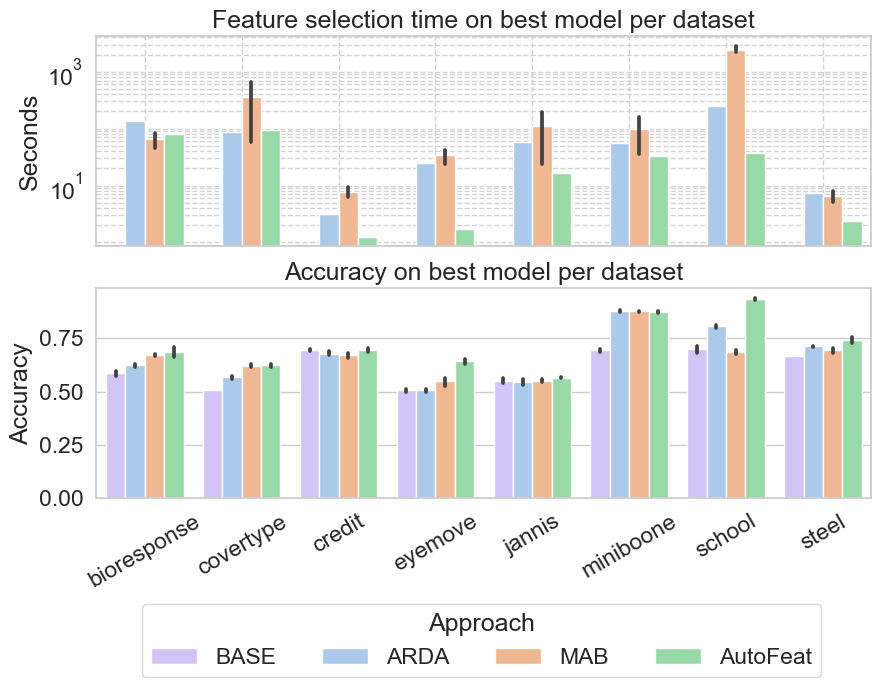

In [26]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', 'feature_selection_time'])[['accuracy']].max().reset_index()
total_time['feature_selection_time'] = total_time['feature_selection_time']

taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]


accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y="feature_selection_time", hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[2]], hue_order=['BASE', 'ARDA', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)


ax1.set_title("Feature selection time on best model per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')



ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Accuracy on best model per dataset")

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
# g._legend.remove()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.45), ncol=4, title="Approach")

plt.savefig('plots/all/dd_simple_acc_feature_selection_time_classification_train_all.pdf', dpi=300, bbox_inches="tight")